<a href="https://colab.research.google.com/github/chimaobi-okite/Tourism_classification/blob/main/Networkx_Tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Applications Of Networkx Shortest Path Algorithms - Tutorial Notebook

### Introduction
I first learnt about networkx while contributing to the project through the outreachy program and on trying out the tutorials, I came across the Dijkstra algorithm used to calculate shortest paths between nodes in a graph. This particular algorithm reminded me of dynamic programming- a topic I learnt last semester in my engineering mathematics course and this motivated me to seek means to solve some its examples using this library. 

The goal of this notebook is to introduce dynamic programming and the particular dynamic programming problems that can be easily solved with Networkx with just few lines of code. Dynamic programming is a very broad topic, so we won't cover how to solve examples introduced here using this approach. If interested, you can check out the chapter 11 of *Introduction to Operations Research by Hillier 10th Edition*

So what is dynamic programming?

Dynamic programming is an algorithmic process of solving a complex optimization problem by breaking it into simpler sub-problems based on the fact that the optimal solution to the overall problem depends upon the optimal solution to its subproblems. Mathematically, optimization is the method of maximizing or minimizing any function based on a particular criterion from a set of available alternatives. Examples include:-
1. Distribution of effort - How can a sales manager allocate sales persons to different stores in order to maximize sales? or how can a student allocate time to study four courses in seven days in order to maximize the obtainable total grade
points?
2. Finding shortest/longest path - what is best route to follow when moving from point A - F in other to decrease cost of transportation. This particular problem class is our main focus in this notebook as it can easily be solved with networkx. 

Excited to see some practical examples?☺️ Lets dive in.

### Setup



In [1]:
# install the required packages
!pip install -qq networkx

In [2]:
# import the required libraries
import networkx as nx
import matplotlib.pyplot as plt


### Example 1- The Stagecoach Problem:

 It concerns a mythical
fortune seeker in Missouri who decided to go west to join the gold rush in California during the mid-19th century. The journey would require traveling by stagecoach through unsettled country where there was serious danger of attack by marauders. Although his starting point and destination were fixed, he had considerable choice as to which states (or
territories that subsequently became states) to travel through en route. The possible routes
are shown in the figure below, where each state is represented by a circled letter and the direction of travel is always from left to right in the diagram. Thus, four stages (stagecoach
runs) were required to travel from his point of embarkation in state A (Missouri) to his
destination in state J (California).
This fortune seeker was a prudent man who was quite concerned about his safety. After some thought, he came up with a rather clever way of determining the safest route. Life insurance policies were offered to stagecoach passengers. Because the cost of the policy
for taking any given stagecoach run was based on a careful evaluation of the safety of that
run, the safest route should be the one with the cheapest total life insurance policy. 

Note: The cost of moving from one state to another is shown on the edge joining the two states

Questions: 
1. Which route minimizes the total cost of the policy?
2. How much will he spend on total life insurance policy if he follows the route in 1 

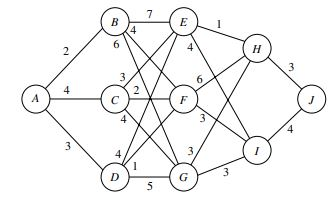

**Solution**

#### Soving the problem

Looking at the diagram above, one might be tempted to select the cheapest run offered at each stage as the optimal solution, infact I did same the first time I came across this problem but does that yield the optimal solution? Lets see....

At stage 1, the cheapest run will be to move from A -> B, B -> F at stage 2, F -> I at 3 and finally I -> J at stage 4. This route will yield a total cost of 13 ie 2+4+3+4. However, sacrificing a little on
one stage may permit greater savings thereafter. For example, A -> D -> F is cheaper
overall than A -> B -> F.

Another approach to solve this problem is through the trail and error method which involves writting down all possible routes in moving from A -> J then selecting the one that gives the optimal solution. The number of possible routes for this task is 18 but what if its 50 or 100? You guessed right, the calculations become cumbersome and not feasible.

Mathematically, the best approach to this task is using dynamic programming. This approach involves starting with small portion of the original problem, find the optimal solution, then gradually enlarge the problem, finding the current optimal solution from the preceding one, until the original problem is solved in its entirety. But as stated earlier the goal will be show how to solve such problems with networkx and we would do so by following the steps outlined below:

1. First represent the problem as networkx graph where each node is a possible state and use weighted edges to represent insurance policy cost from one node(state) to another. 
2. Use networkx implementation of the Dijkstra’s algorithm to find the shortest path/length between the start node(A) and distination node(J).
3. Present your results and you're done. Yes it is that easy :)

Note: I won't go into the details of how Dijkstra's algorithm was used to find shortest path between pairs of nodes as Networkx has a comprehensive guide that explains it. Check it @ [https://networkx.guide/algorithms/shortest-path/dijkstra](https://networkx.guide/algorithms/shortest-path/dijkstra)

In [3]:
## Step 1: creating the graph

G = nx.DiGraph() # instanstaiate a directed graph since the man travels in a directed manner fom A to J
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']) # add nodes representing each possible state (optional as nodes can be infered from edges)
# define the edges using the insurance policy cost as weights
edges = [('A', 'B', 2), ('A', 'C', 4), ('A', 'D', 3), 
         ('B', 'E', 7), ('B', 'F', 4),('B', 'G', 6),
         ('C', 'E', 3), ('C', 'F', 2), ('C', 'G', 4),
         ('D', 'E', 4), ('D', 'F', 1), ('D', 'G', 5),
         ('E', 'H',1), ('E','I', 4),('F', 'H',6),
         ('F','I', 3), ('G', 'H',3), ('G','I', 3),
         ('H', 'J',3), ('I','J', 4)]
G.add_weighted_edges_from(edges) # add the weighted edges to the graph

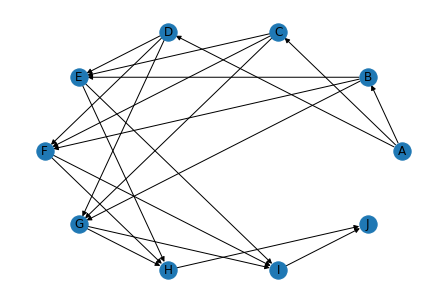

In [4]:
nx.draw(G,pos=nx.circular_layout(G), with_labels=True) # get a feel of the graph looks like by plotting it

For the pos argument used above, choose a layout that clearly shows the interactions between nodes. Networkx has lots of options that can be found [here](https://networkx.org/documentation/latest/reference/drawing.html). Using the default option sometimes really messes things up

In [5]:
## Step 2:
sp = nx.all_shortest_paths(G, source='A', target='J', weight='weight', method='dijkstra') # find all shortest paths (canbe more than one)
min_cost = nx.shortest_path_length(G, source='A', target='J', weight='weight', method='dijkstra') # find the shortest length (minimum insurance policy in our case)

## Step 3:- display results
print('The safest route for mythical fortune seeker based on cost insurance policy is ')
for path in sp:
  print(path)

print(f'The minimum insurance policy cost is {min_cost}')

The safest route for mythical fortune seeker based on cost insurance policy is 
['A', 'D', 'F', 'I', 'J']
['A', 'D', 'E', 'H', 'J']
['A', 'C', 'E', 'H', 'J']
The minimum insurance policy cost is 11


That was so easy, wasn't it? To solidify our claims, why not see a second example?

### Example Two: Networkx for project management

Consider the following project network when applying
PERT/CPM where the number over each
node is the time required for the corresponding activity.

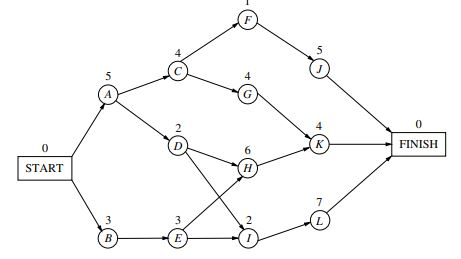

1. Find the criical path of the network
2. What is the critical path time

**Solution**

In project management, the critical path is the longest sequence of tasks that must be completed to complete a project. The tasks on the critical path are called critical activities because if they’re delayed, the whole project completion will be delayed.

So unlike the previous example where we were asked to find the route that minimizes cost (ie.shortest path in the graph), here we are to find the longest path.

Networkx has no out of the box method for finding longest path between two nodes but has nx.all_simple_paths that returns all simple paths between two nodes. So we can define a function that utilizes the simple paths generated nx.all_simple_paths to solve our problem. We will create this function below then continue with the solution as before. 

In [6]:
def find_longest_path(G , source, target, weight = 'weight'):
    """Compute all longest simple paths in the graph along with the longest length.
    
    Args:
        G : Weighted NetworkX graph.

        source : node
          Starting node for path.

        target : node
          Ending node for path.

        weight : str
          String representing the edge attribute used as edge weight

    Raises:
        AssertionError: G must be a weighted graph .

    Returns:
        longest_length : Length of the longest path between specified nodes in the graph.
        longest_paths (List) : list of the longest paths between specified nodes in the graph
    
    """
    assert nx.is_weighted(G) == True, 'G must be a weighted graph'
    simple_paths = nx.all_simple_paths(G, source, target)
    longest_length = 0
    longest_paths = []
    for path in simple_paths:
      length = len(path)
      path_len = 0
      for i in range(length-1):
        path_len += G[path[i]][path[i+1]][weight]
      if path_len >= longest_length:
        longest_length = path_len
        longest_paths.append([path, path_len])
    longest_paths = [p[0] for p in longest_paths if p[1] == longest_length]
    
    return longest_length, longest_paths

In [7]:
# as usual create a graph and add the edges
G = nx.DiGraph()
edges = [('START', 'A', 5), ('START', 'B', 3), ('A', 'C', 4),
         ('A', 'D', 2),('B', 'E', 3),('C', 'F', 1), ('C', 'G', 4),
         ('D', 'H', 6), ('D', 'I', 2), ('E', 'H', 6), ('E', 'I', 2),
         ('F', 'J', 5), ('G', 'K', 4), ('H', 'K', 4), ('I', 'L', 7),
         ('J', 'FINISH', 0), ('K', 'FINISH', 0), ('L', 'FINISH', 0)]
G.add_weighted_edges_from(edges) # add the weighted edges to the graph

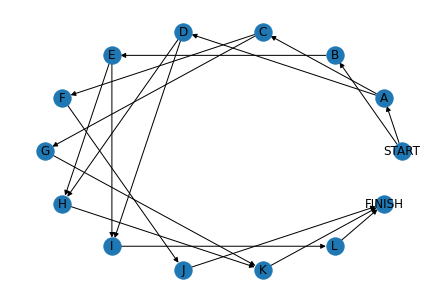

In [8]:
nx.draw(G,pos=nx.circular_layout(G), with_labels=True) # get a feel of the gaph looks like by plotting it

In [9]:
# now utilize the previously defined function to get the longest path and length
longest_length, longest_path = find_longest_path(G , 'START', 'FINISH')

## display results
print('The critical path for the project is/are  -> ')
for path in longest_path:
  print(path)

print(f'While the critical time is {longest_length}')

The critical path for the project is/are  -> 
['START', 'A', 'C', 'G', 'K', 'FINISH']
['START', 'A', 'D', 'H', 'K', 'FINISH']
While the critical time is 17


### Conclusion

I find it very exciting to be able to solve these complex problems with just few lines of code especially knowing how long it took me to achieve same results with dynamic programming. I hope this notebook gives you some insights on how to approach similar tasks for your own use cases using Networkx. 

**Thank you!!!!**